Coefficients: [0.34436445 1.00142073 0.65691539 0.31804928 0.66865308 0.96918717
 0.98947294 0.34131356 0.68330383]
Intercept: 0.01432759815122786


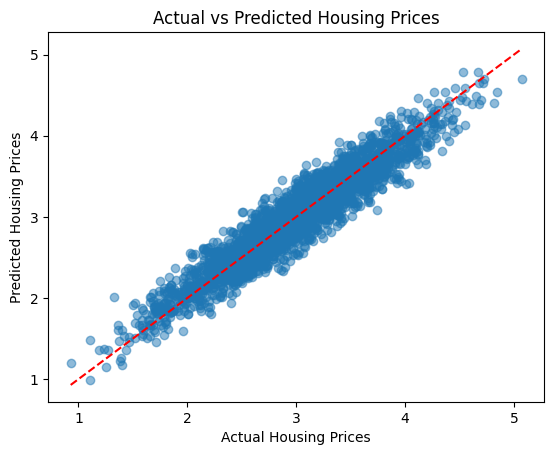

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Set seed for reproducibility
np.random.seed(42)

# Generate random data for the three dataframes
# DataFrame 1: Location and Crime
location_data = pd.DataFrame({
    'near_urban': np.random.rand(5000),
    'crime_free': np.random.rand(5000),
    'view': np.random.rand(5000)
})

# DataFrame 2: Age and Size
house_data = pd.DataFrame({
    'size': np.random.rand(5000),
    'age': np.random.rand(5000),
    'style': np.random.rand(5000)
})

# DataFrame 3: Government Policy
policy_data = pd.DataFrame({
    'policy': np.random.rand(5000),
    'tax': np.random.rand(5000),
    'growth': np.random.rand(5000)
})

# Generate housing prices based on the linear utility function
# Assuming the linear utility function:
housing_prices = (
    1/3 * location_data['near_urban'] +
    1 * location_data['crime_free'] +
    2/3 * location_data['view']+
    1/3 * house_data['size'] +
    2/3 * house_data['age'] +
    1 * house_data['style'] +
    1 * policy_data['policy'] +
    1/3 * policy_data['tax']+
    2/3 * policy_data['growth']+
    np.random.normal(scale=0.2, size=5000)  # Adding some random noise
)

# Combine the dataframes
combined_data = pd.concat([location_data, house_data, policy_data], axis=1)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(combined_data, housing_prices, test_size=0.5, random_state=42)

# Create and train the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Get the coefficients
coefficients = model.coef_
intercept = model.intercept_

# Print the coefficients
print(f'Coefficients: {coefficients}')
print(f'Intercept: {intercept}')

# Make predictions on the test set
predictions = model.predict(X_test)

import matplotlib.pyplot as plt

# Visualize the actual vs predicted housing prices
plt.scatter(y_test, predictions, alpha=0.5)

# Identity line
min_val = min(y_test.min(), predictions.min())  # Find the minimum value for starting point
max_val = max(y_test.max(), predictions.max())  # Find the maximum value for ending point
plt.plot([min_val, max_val], [min_val, max_val], 'r--')  # Plotting the line with red dashes

plt.xlabel('Actual Housing Prices')
plt.ylabel('Predicted Housing Prices')
plt.title('Actual vs Predicted Housing Prices')
plt.show()


In [30]:
################################BOD and MOD application##############################################
import time
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

execution_times_MOD=[]
execution_times_BOD=[]
# row=10000

TheRows=[5000,10000,15000]
column=3

# TheColumns=[3,6,9]
# for i in TheColumns:
#   column=i


for i in TheRows:
  row=i

  import pandas as pd
  import random

# Set seed for reproducibility
  np.random.seed(42)

# Generate random data for the three dataframes
# DataFrame 1: Location and Crime
  location_data = pd.DataFrame({
    'near_urban': np.random.rand(row),
    'crime_free': np.random.rand(row),
    'view': np.random.rand(row)
})

# DataFrame 2: Age and Size
  house_data = pd.DataFrame({
    'size': np.random.rand(row),
    'age': np.random.rand(row),
    'style': np.random.rand(row)
})

# DataFrame 3: Government Policy
  policy_data = pd.DataFrame({
    'policy': np.random.rand(row),
    'tax': np.random.rand(row),
    'growth': np.random.rand(row)
})

# Combine the dataframes
  combined_data = pd.concat([location_data, house_data, policy_data], axis=1)


##################################################   BOD      ######################################################################
# Record the starting time
  start_time_BOD = time.time()
# Selecting specific columns from the combined DataFrame
  new_combined_df=combined_data
  selected_columns_1 = new_combined_df[['crime_free', 'style', 'policy']]

# Find the maximum sum among all rows
  max_row_sum_1 = selected_columns_1.sum(axis=1).max()

# Find the index of the row(s) with the maximum sum among all rows
  max_sum_index_1 = selected_columns_1.sum(axis=1).idxmax()
  y_min_1=max_row_sum_1

# Calculate the sum of values in the row with index max_sum_index
  y_max_1 = new_combined_df.loc[max_sum_index_1].sum()

  sum_all_rows_1=new_combined_df.sum(axis=1)
  return_sum_list_1=[]
  return_index_list_1=[]
  for i in sum_all_rows_1:
    if i<=y_max_1 and i>= y_min_1:
      return_sum_list_1.append(i)

  for idx, i in enumerate(new_combined_df.sum(axis=1)):
      for j in return_sum_list_1:
          if i == j:
              return_index_list_1.append(idx)

  distinct_values_1 = list(set(return_index_list_1))
######################################################## ROUND 2 ############################################################

# List of specific indices to select is distinct_values_1
# Selecting rows with specific indices using iloc and creating a new DataFrame with the same index
  filter_1st_dataframe = new_combined_df.iloc[distinct_values_1].copy()

# Selecting specific columns from the combined DataFrame
  selected_columns_2 = filter_1st_dataframe[['crime_free', 'style', 'policy','view','age','growth']]

# # Display the selected columns from the combined DataFrame
# print("\nSelected Columns:")
# print(selected_columns_2)

# Find the maximum sum among all rows
  max_row_sum_2 = selected_columns_2.sum(axis=1).max()
# print(max_row_sum_2)

# Find the index of the row(s) with the maximum sum among all rows
  max_sum_index_2 = selected_columns_2.sum(axis=1).idxmax()
# print(max_sum_index_2)
  y_min_2=max_row_sum_2

# Calculate the sum of values in the row with index max_sum_index
  y_max_2 = filter_1st_dataframe.loc[max_sum_index_2].sum()
# print(y_max_2)

  sum_all_rows_2=filter_1st_dataframe.sum(axis=1)
# print(sum_all_rows)

  return_sum_list_2=[]
  return_index_list_2=[]
  for i in sum_all_rows_2:
    if i<=y_max_2 and i>= y_min_2:
      return_sum_list_2.append(i)

  for idx, i in enumerate(filter_1st_dataframe.sum(axis=1)):
      for j in return_sum_list_2:
          if i == j:
              return_index_list_2.append(idx)

# print(return_index_list)
  distinct_values_2 = list(set(return_index_list_2))
# print(distinct_values_2)

# b=0
# for i in range(len(distinct_values_2)):
#   b+=1
# print(b)

######################################################## ROUND 3 - final round in 3 columns table ############################################################

# List of specific indices to select is distinct_values_2
# Selecting rows with specific indices using iloc and creating a new DataFrame with the same index
  filter_2nd_theFinal_dataframe = filter_1st_dataframe.iloc[distinct_values_2].copy()

# Selecting specific columns from the combined DataFrame
  selected_columns_3 = filter_2nd_theFinal_dataframe

# # Display the selected columns from the combined DataFrame
# print("\nSelected Columns:")
# print(selected_columns_3)

# Find the maximum sum among all rows
  max_row_sum_3 = selected_columns_3.sum(axis=1).max()
# print(max_row_sum_3)

# Find the index of the row(s) with the maximum sum among all rows
  max_sum_index_3 = selected_columns_3.sum(axis=1).idxmax()
# print(max_sum_index_3)

  y_min_3=max_row_sum_3

# Calculate the sum of values in the row with index max_sum_index
  y_max_3 = filter_2nd_theFinal_dataframe.loc[max_sum_index_3].sum()
# print(y_max_3)

  sum_all_rows_3=filter_2nd_theFinal_dataframe.sum(axis=1)
# print(sum_all_rows)

  return_sum_list_3=[]
  return_index_list_3=[]
  for i in sum_all_rows_3:
    if i<=y_max_3 and i>= y_min_3:
      return_sum_list_3.append(i)

  for idx, i in enumerate(filter_2nd_theFinal_dataframe.sum(axis=1)):
      for j in return_sum_list_3:
        if i == j:
              return_index_list_3.append(idx)

  distinct_values_3 = list(set(return_index_list_3))


# Record the ending time
  end_time_BOD = time.time()

# Calculate the running time by finding the difference
  running_time_seconds_BOD = end_time_BOD - start_time_BOD
  print(f"Running time for BOD: {running_time_seconds_BOD} seconds")
  execution_times_BOD.append(running_time_seconds_BOD)
########################################################################################################################

################################################# MOD  #################################################################

# Record the starting time
  start_time_MOD = time.time()
# Generate housing prices based on the linear utility function
# Assuming the linear utility function:
  housing_prices = (
    1/3 * location_data['near_urban'] +
    1 * location_data['crime_free'] +
    2/3 * location_data['view']+
    1/3 * house_data['size'] +
    2/3 * house_data['age'] +
    1 * house_data['style'] +
    1 * policy_data['policy'] +
    1/3 * policy_data['tax']+
    2/3 * policy_data['growth']+
    np.random.normal(scale=0.2, size=row)  # Adding some random noise
)


# Split the data into training and testing sets
  X_train, X_test, y_train, y_test = train_test_split(combined_data, housing_prices, test_size=0.5, random_state=42)

# Create and train the linear regression model
  model = LinearRegression()
  model.fit(X_train, y_train)

# Get the coefficients
  coefficients = model.coef_
  intercept = model.intercept_

# # Print the coefficients
#   print(f'Coefficients: {coefficients}')
#   print(f'Intercept: {intercept}')

# Make predictions on the test set
  predictions = model.predict(X_test)

# # Visualize the actual vs predicted housing prices
#   plt.scatter(y_test, predictions)
#   plt.xlabel('Actual Housing Prices')
#   plt.ylabel('Predicted Housing Prices')
#   plt.title('Actual vs Predicted Housing Prices')
#   plt.show()

#################################################################################################################

# Record the ending time
  end_time_MOD = time.time()

# Calculate the running time by finding the difference
  running_time_seconds_MOD = end_time_MOD - start_time_MOD
  print(f"Running time for MOD: {running_time_seconds_MOD} seconds")
  execution_times_MOD.append(running_time_seconds_MOD)
########################################################################################################################



Running time for BOD: 1.1678707599639893 seconds
Running time for MOD: 0.011237621307373047 seconds
Running time for BOD: 6.079267740249634 seconds
Running time for MOD: 0.012763261795043945 seconds
Running time for BOD: 10.647879600524902 seconds
Running time for MOD: 0.009322643280029297 seconds


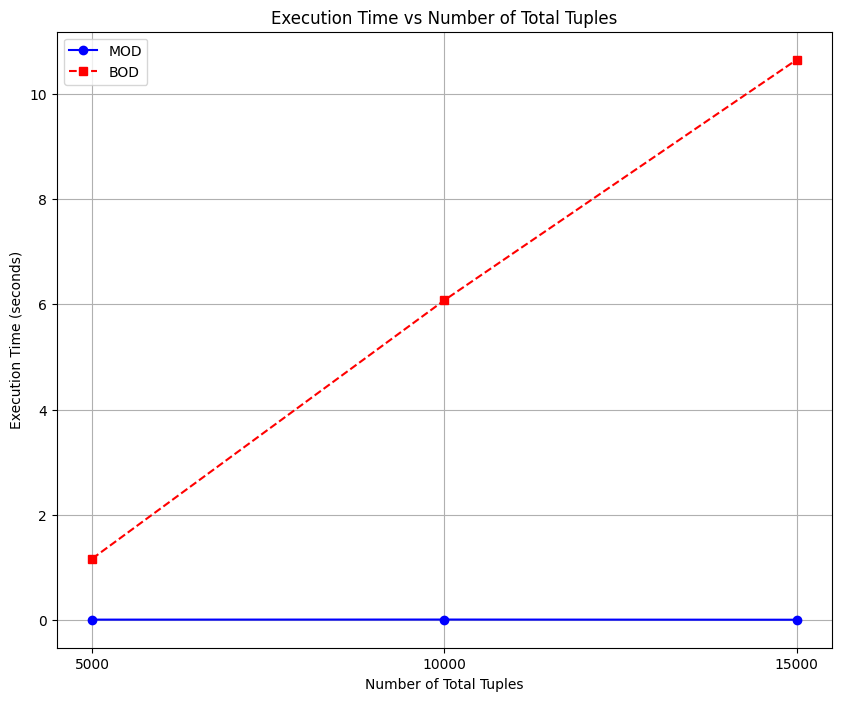

In [34]:

import matplotlib.pyplot as plt

# Input sizes
input_sizes = [5000, 10000, 15000]

# Plotting the chart
plt.figure(figsize=(10, 8))

# Plotting the first line
plt.plot(input_sizes, execution_times_MOD, marker='o', linestyle='-', color='b', label='MOD')

# Plotting the second line
plt.plot(input_sizes, execution_times_BOD, marker='s', linestyle='--', color='r', label='BOD')

# Adding titles and labels
plt.title('Execution Time vs Number of Total Tuples')
plt.xlabel('Number of Total Tuples')
plt.ylabel('Execution Time (seconds)')

# Setting x-axis ticks to input sizes for clarity
plt.xticks(input_sizes)


# Adding grid for better readability
plt.grid(True)

# Adding a legend to distinguish between the two lines
plt.legend()

# Displaying the plot
plt.show()



In [35]:
################################BOD and MOD application##############################################
import time
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

execution_times_MOD=[]
execution_times_BOD=[]
row=10000

# TheRows=[5000,10000,15000]
# column=3

TheColumns=[3,4,5]
for i in TheColumns:
  column=i


# for i in TheRows:
#   row=i

  import pandas as pd
  import random

# Set seed for reproducibility
  np.random.seed(42)

# Generate random data for the three dataframes
# DataFrame 1: Location and Crime
  location_data = pd.DataFrame({
    'near_urban': np.random.rand(row),
    'crime_free': np.random.rand(row),
    'view': np.random.rand(row),
    'neighbor': np.random.rand(row),
    'noise_free': np.random.rand(row)
})

# DataFrame 2: Age and Size
  house_data = pd.DataFrame({
    'size': np.random.rand(row),
    'age': np.random.rand(row),
    'style': np.random.rand(row),
    'color': np.random.rand(row),
    'material':np.random.rand(row)
})

# DataFrame 3: Government Policy
  policy_data = pd.DataFrame({
    'policy': np.random.rand(row),
    'tax': np.random.rand(row),
    'growth': np.random.rand(row),
    'healthcare':np.random.rand(row),
    'voting':np.random.rand(row)
})

# Combine the dataframes
  combined_data = pd.concat([location_data, house_data, policy_data], axis=1)


##################################################   BOD      ######################################################################
# Record the starting time
  start_time_BOD = time.time()
# Selecting specific columns from the combined DataFrame
  new_combined_df=combined_data
  selected_columns_1 = new_combined_df[['crime_free', 'style', 'policy']]

# Find the maximum sum among all rows
  max_row_sum_1 = selected_columns_1.sum(axis=1).max()

# Find the index of the row(s) with the maximum sum among all rows
  max_sum_index_1 = selected_columns_1.sum(axis=1).idxmax()
  y_min_1=max_row_sum_1

# Calculate the sum of values in the row with index max_sum_index
  y_max_1 = new_combined_df.loc[max_sum_index_1].sum()

  sum_all_rows_1=new_combined_df.sum(axis=1)
  return_sum_list_1=[]
  return_index_list_1=[]
  for i in sum_all_rows_1:
    if i<=y_max_1 and i>= y_min_1:
      return_sum_list_1.append(i)

  for idx, i in enumerate(new_combined_df.sum(axis=1)):
      for j in return_sum_list_1:
          if i == j:
              return_index_list_1.append(idx)

  distinct_values_1 = list(set(return_index_list_1))
######################################################## ROUND 2 ############################################################

# List of specific indices to select is distinct_values_1
# Selecting rows with specific indices using iloc and creating a new DataFrame with the same index
  filter_1st_dataframe = new_combined_df.iloc[distinct_values_1].copy()

# Selecting specific columns from the combined DataFrame
  selected_columns_2 = filter_1st_dataframe[['crime_free', 'style', 'policy','view','age','growth']]

# # Display the selected columns from the combined DataFrame
# print("\nSelected Columns:")
# print(selected_columns_2)

# Find the maximum sum among all rows
  max_row_sum_2 = selected_columns_2.sum(axis=1).max()
# print(max_row_sum_2)

# Find the index of the row(s) with the maximum sum among all rows
  max_sum_index_2 = selected_columns_2.sum(axis=1).idxmax()
# print(max_sum_index_2)
  y_min_2=max_row_sum_2

# Calculate the sum of values in the row with index max_sum_index
  y_max_2 = filter_1st_dataframe.loc[max_sum_index_2].sum()
# print(y_max_2)

  sum_all_rows_2=filter_1st_dataframe.sum(axis=1)
# print(sum_all_rows)

  return_sum_list_2=[]
  return_index_list_2=[]
  for i in sum_all_rows_2:
    if i<=y_max_2 and i>= y_min_2:
      return_sum_list_2.append(i)

  for idx, i in enumerate(filter_1st_dataframe.sum(axis=1)):
      for j in return_sum_list_2:
          if i == j:
              return_index_list_2.append(idx)

# print(return_index_list)
  distinct_values_2 = list(set(return_index_list_2))
# print(distinct_values_2)

# b=0
# for i in range(len(distinct_values_2)):
#   b+=1
# print(b)

######################################################## ROUND 3 in n columns table ############################################################

# List of specific indices to select is distinct_values_2
# Selecting rows with specific indices using iloc and creating a new DataFrame with the same index
  filter_2nd_theFinal_dataframe = filter_1st_dataframe.iloc[distinct_values_2].copy()

# Selecting specific columns from the combined DataFrame
  selected_columns_3 = filter_2nd_theFinal_dataframe[['crime_free', 'style', 'policy','view','age','growth','near_urban','size','tax']]

# # Display the selected columns from the combined DataFrame
# print("\nSelected Columns:")
# print(selected_columns_3)

# Find the maximum sum among all rows
  max_row_sum_3 = selected_columns_3.sum(axis=1).max()
# print(max_row_sum_3)

# Find the index of the row(s) with the maximum sum among all rows
  max_sum_index_3 = selected_columns_3.sum(axis=1).idxmax()
# print(max_sum_index_3)

  y_min_3=max_row_sum_3

# Calculate the sum of values in the row with index max_sum_index
  y_max_3 = filter_2nd_theFinal_dataframe.loc[max_sum_index_3].sum()
# print(y_max_3)

  sum_all_rows_3=filter_2nd_theFinal_dataframe.sum(axis=1)
# print(sum_all_rows)

  return_sum_list_3=[]
  return_index_list_3=[]
  for i in sum_all_rows_3:
    if i<=y_max_3 and i>= y_min_3:
      return_sum_list_3.append(i)

  for idx, i in enumerate(filter_2nd_theFinal_dataframe.sum(axis=1)):
      for j in return_sum_list_3:
        if i == j:
              return_index_list_3.append(idx)

  distinct_values_3 = list(set(return_index_list_3))

######################################################## ROUND 4 in n columns table ############################################################

# List of specific indices to select is distinct_values_2
# Selecting rows with specific indices using iloc and creating a new DataFrame with the same index
  filter_3rd_theFinal_dataframe = filter_2nd_theFinal_dataframe.iloc[distinct_values_3].copy()

# Selecting specific columns from the combined DataFrame
  selected_columns_4 = filter_3rd_theFinal_dataframe[['crime_free', 'style', 'policy','view','age','growth','near_urban','size','tax','neighbor','material','healthcare']]

# # Display the selected columns from the combined DataFrame
# print("\nSelected Columns:")
# print(selected_columns_4)

# Find the maximum sum among all rows
  max_row_sum_4 = selected_columns_4.sum(axis=1).max()
# print(max_row_sum_4)

# Find the index of the row(s) with the maximum sum among all rows
  max_sum_index_4 = selected_columns_4.sum(axis=1).idxmax()
# print(max_sum_index_4)

  y_min_4=max_row_sum_4

# Calculate the sum of values in the row with index max_sum_index
  y_max_4 = filter_3rd_theFinal_dataframe.loc[max_sum_index_4].sum()
# print(y_max_4)

  sum_all_rows_4=filter_3rd_theFinal_dataframe.sum(axis=1)
# print(sum_all_rows)

  return_sum_list_4=[]
  return_index_list_4=[]
  for i in sum_all_rows_4:
    if i<=y_max_4 and i>= y_min_4:
      return_sum_list_4.append(i)

  for idx, i in enumerate(filter_3rd_theFinal_dataframe.sum(axis=1)):
      for j in return_sum_list_4:
        if i == j:
              return_index_list_4.append(idx)

  distinct_values_4 = list(set(return_index_list_4))
######################################################## ROUND 5-final in n columns table ############################################################

# List of specific indices to select is distinct_values_2
# Selecting rows with specific indices using iloc and creating a new DataFrame with the same index
  filter_4th_theFinal_dataframe = filter_3rd_theFinal_dataframe.iloc[distinct_values_4].copy()

# Selecting specific columns from the combined DataFrame
  selected_columns_5 = filter_4th_theFinal_dataframe

# # Display the selected columns from the combined DataFrame
# print("\nSelected Columns:")
# print(selected_columns_5)

# Find the maximum sum among all rows
  max_row_sum_5 = selected_columns_5.sum(axis=1).max()
# print(max_row_sum_5)

# Find the index of the row(s) with the maximum sum among all rows
  max_sum_index_5 = selected_columns_5.sum(axis=1).idxmax()
# print(max_sum_index_5)

  y_min_5=max_row_sum_5

# Calculate the sum of values in the row with index max_sum_index
  y_max_5 = filter_4th_theFinal_dataframe.loc[max_sum_index_5].sum()
# print(y_max_5)

  sum_all_rows_5=filter_4th_theFinal_dataframe.sum(axis=1)
# print(sum_all_rows)

  return_sum_list_5=[]
  return_index_list_5=[]
  for i in sum_all_rows_5:
    if i<=y_max_5 and i>= y_min_5:
      return_sum_list_5.append(i)

  for idx, i in enumerate(filter_4th_theFinal_dataframe.sum(axis=1)):
      for j in return_sum_list_5:
        if i == j:
              return_index_list_5.append(idx)

  distinct_values_5 = list(set(return_index_list_5))

# Record the ending time
  end_time_BOD = time.time()

# Calculate the running time by finding the difference
  running_time_seconds_BOD = end_time_BOD - start_time_BOD
  print(f"Running time for BOD: {running_time_seconds_BOD} seconds")
  execution_times_BOD.append(running_time_seconds_BOD)
########################################################################################################################

################################################# MOD  #################################################################

# Record the starting time
  start_time_MOD = time.time()
# Generate housing prices based on the linear utility function
# Assuming the linear utility function:
  housing_prices = (
    1 * location_data['crime_free'] +
    4/5 * location_data['view']+
    3/5 * location_data['near_urban'] +
    2/5 * location_data['neighbor']+
    1/5 * location_data['noise_free']+

    1 * house_data['style'] +
    4/5 * house_data['age'] +
    3/5 * house_data['size'] +
    2/5 * house_data['material']+
    1/5 * house_data['color']+

    1 * policy_data['policy'] +
    4/5 * policy_data['growth']+
    3/5 * policy_data['tax']+
    2/5 * policy_data['healthcare']+
    1/5 * policy_data['voting']+
    np.random.normal(scale=0.2, size=row)  # Adding some random noise
)


# Split the data into training and testing sets
  X_train, X_test, y_train, y_test = train_test_split(combined_data, housing_prices, test_size=0.5, random_state=42)

# Create and train the linear regression model
  model = LinearRegression()
  model.fit(X_train, y_train)

# Get the coefficients
  coefficients = model.coef_
  intercept = model.intercept_

# # Print the coefficients
#   print(f'Coefficients: {coefficients}')
#   print(f'Intercept: {intercept}')

# Make predictions on the test set
  predictions = model.predict(X_test)

# # Visualize the actual vs predicted housing prices
#   plt.scatter(y_test, predictions)
#   plt.xlabel('Actual Housing Prices')
#   plt.ylabel('Predicted Housing Prices')
#   plt.title('Actual vs Predicted Housing Prices')
#   plt.show()

#################################################################################################################

# Record the ending time
  end_time_MOD = time.time()

# Calculate the running time by finding the difference
  running_time_seconds_MOD = end_time_MOD - start_time_MOD
  print(f"Running time for MOD: {running_time_seconds_MOD} seconds")
  execution_times_MOD.append(running_time_seconds_MOD)
########################################################################################################################



Running time for BOD: 11.48581862449646 seconds
Running time for MOD: 0.016828060150146484 seconds
Running time for BOD: 11.551121234893799 seconds
Running time for MOD: 0.015228986740112305 seconds
Running time for BOD: 11.633313655853271 seconds
Running time for MOD: 0.012416362762451172 seconds


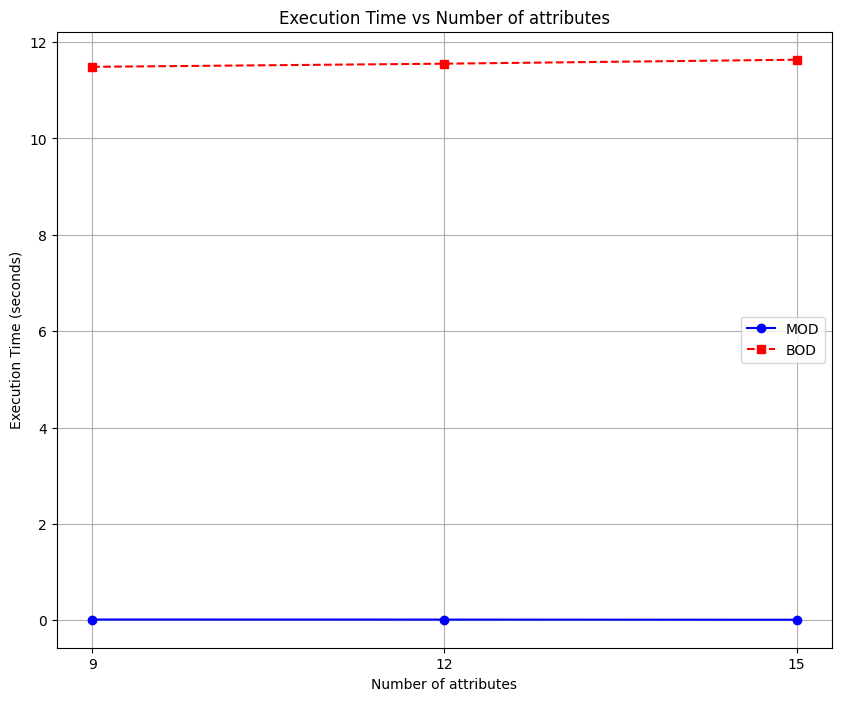

In [36]:

import matplotlib.pyplot as plt

# Input sizes
input_sizes = [9, 12, 15]

# Plotting the chart
plt.figure(figsize=(10, 8))

# Plotting the first line
plt.plot(input_sizes, execution_times_MOD, marker='o', linestyle='-', color='b', label='MOD')

# Plotting the second line
plt.plot(input_sizes, execution_times_BOD, marker='s', linestyle='--', color='r', label='BOD')

# Adding titles and labels
plt.title('Execution Time vs Number of attributes')
plt.xlabel('Number of attributes')
plt.ylabel('Execution Time (seconds)')

# Setting x-axis ticks to input sizes for clarity
plt.xticks(input_sizes)


# Adding grid
plt.grid(True)

# Adding a legend for 2 lines
plt.legend()

# Displaying the plot
plt.show()

